In [4]:
# KNN训练，得出最合适的K值
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# 生成一些随机样本
n_points = 100
X1 = np.random.multivariate_normal([1, 50], [[1, 0], [0, 10]], n_points)
X2 = np.random.multivariate_normal([2, 50], [[1, 0], [0, 10]], n_points)

print(X1, X2)

x = np.concatenate([X1, X2])
y = np.array([0] * n_points + [1] * n_points)

print(x.shape, y.shape)

[[ 8.71943148e-01  4.92617026e+01]
 [ 1.24967300e+00  4.85049982e+01]
 [-1.00123352e+00  4.74402693e+01]
 [ 4.15444047e-01  5.29836095e+01]
 [ 9.84991738e-01  5.24212411e+01]
 [ 5.29842705e-01  4.87711027e+01]
 [ 1.26735433e-01  4.94053131e+01]
 [-7.47709239e-01  4.56835480e+01]
 [ 7.69898028e-01  4.74352723e+01]
 [ 1.90609672e+00  5.67860033e+01]
 [ 6.12180681e-01  5.01969749e+01]
 [ 1.06285155e+00  4.87974402e+01]
 [-1.59662120e-01  4.48867470e+01]
 [ 4.91778558e-01  4.97488749e+01]
 [ 5.38305176e-02  4.73815593e+01]
 [-4.33476663e-01  5.49049681e+01]
 [ 1.85472577e+00  5.31506343e+01]
 [-2.76231729e-01  4.82074946e+01]
 [ 1.64897202e+00  5.07146268e+01]
 [ 9.13146337e-01  5.01544164e+01]
 [ 1.67525639e+00  5.05996541e+01]
 [ 1.43273602e+00  4.63215323e+01]
 [ 1.16264661e+00  4.62188097e+01]
 [ 1.49133816e+00  4.63335887e+01]
 [ 7.94816845e-01  4.81471426e+01]
 [ 4.66068724e-01  4.93427349e+01]
 [ 8.71955144e-01  5.61128532e+01]
 [ 1.96661975e+00  4.80434465e+01]
 [ 1.22759340e+00  5

In [7]:
# KNN模型的训练过程
clfs = []
neighbors = [1, 3, 5, 9, 11, 13, 15, 17, 19]

for i in range(len(neighbors)):
    clfs.append(KNeighborsClassifier(n_neighbors = neighbors[i]).fit(x, y))

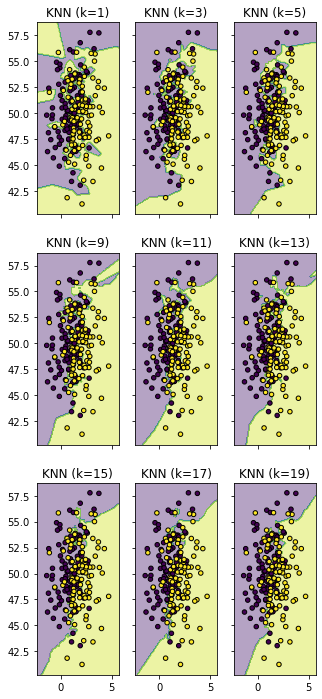

In [8]:
# 可视化结果
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3,3, sharex = 'col', sharey = 'row', figsize = (5, 12))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]), clfs, ['KNN (k=%d)' %k for k in neighbors]):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, z, alpha = 0.4)
    axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c = y, s = 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()    